## Montecarlo y Bootstrapping

In [1]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import seaborn as sns

### Ejercicio 1

In [1]:
from read import read_data_ibex_div

In [2]:
ibex_div = read_data_ibex_div('ibex_div_data_close.csv')
ibex_div

,close_ibex_div
date,
2004-01-02,11162.3
2004-01-05,11212.3
2004-01-07,11216.7
2004-01-08,11260.6
2004-01-09,11234.5
...,...
2019-05-20,26105.5
2019-05-21,26217.3
2019-05-22,26197.7


### Ejercicio 2

In [4]:
returns_ibex_div = np.log(ibex_div).diff().dropna()
ibex_div['returns_ibex_div'] = returns_ibex_div
ibex_div

,close_ibex_div,returns_ibex_div
date,,
2004-01-02,11162.3,NaN
2004-01-05,11212.3,0.004469
2004-01-07,11216.7,0.000392
2004-01-08,11260.6,0.003906
2004-01-09,11234.5,-0.002321
...,...,...
2019-05-20,26105.5,-0.008700
2019-05-21,26217.3,0.004273
2019-05-22,26197.7,-0.000748


### Ejercicio 3

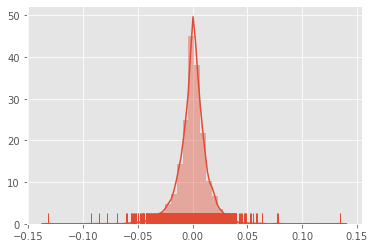

In [5]:
fig, ax = plt.subplots()
sns.distplot(returns_ibex_div, rug=True, ax=ax)

In [6]:
#Sigue una distribución normal,se agrupa entorno a la media. Tiene forma de campana de Gauss

### Ejercicio 4

In [7]:
mu = ibex_div.returns_ibex_div.mean()
sigma = ibex_div.returns_ibex_div.std()

In [8]:
num_sim = 1000
dates = pd.date_range(start = '2019-05-24', periods = (252*5), freq = 'B')
n = dates.shape[0]
daily_returns_ibex_div = mu + sigma * np.random.randn(n, num_sim)
df_ibex_div = pd.DataFrame(daily_returns_ibex_div,dates)
df_ibex_div

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,-0.002479,0.008719,0.006093,-0.007386,-0.021826,0.024436,-0.012016,-0.008905,0.023977,-0.020802,...,-0.015029,0.009895,0.012153,0.004985,0.014984,0.008650,0.014013,-0.002813,-0.002544,0.019394
2019-05-27,-0.018888,-0.021323,-0.009108,0.010337,-0.012419,0.013339,0.007962,-0.008474,0.034278,0.009773,...,0.003116,0.010476,0.004019,0.002000,-0.003401,0.012373,-0.003733,-0.026236,0.001222,0.008050
2019-05-28,-0.039013,0.000512,-0.001674,0.006976,0.014438,0.009445,-0.016683,0.012076,-0.022754,-0.006037,...,-0.017798,-0.002164,0.000445,0.005689,-0.027790,-0.007832,0.013687,0.015222,-0.008526,0.002803
2019-05-29,-0.005968,0.015845,-0.008695,-0.002528,-0.017011,0.017338,-0.006646,0.005296,-0.004867,0.026995,...,0.006020,0.012280,0.005343,-0.007276,-0.000415,-0.012861,0.022539,-0.010733,-0.016121,-0.010626
2019-05-30,0.027476,0.014879,0.009093,-0.008267,-0.004634,0.006865,0.013011,-0.003558,-0.000521,0.001542,...,0.004030,0.004015,0.013656,-0.005377,0.003372,0.002414,-0.001943,-0.001311,-0.022408,-0.025183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,-0.016298,-0.023301,-0.005151,0.014071,0.001106,-0.004706,0.018442,-0.037710,0.018553,-0.012192,...,-0.004483,0.002943,-0.003296,0.019771,0.029019,-0.013867,-0.005604,0.019324,-0.013109,0.016031
2024-03-18,0.001264,-0.018863,-0.020693,0.012143,-0.003691,-0.024799,-0.020736,-0.016971,0.005391,0.008921,...,0.009184,-0.008231,-0.024534,-0.021428,-0.014319,0.003791,0.024473,-0.014378,0.001861,0.009333
2024-03-19,-0.044171,0.018719,-0.015764,0.005026,0.030037,0.001207,0.009626,0.000746,-0.037551,-0.003369,...,0.012250,-0.000745,-0.038657,-0.004684,0.005477,-0.016212,-0.005929,-0.005605,0.002169,-0.010693
2024-03-20,0.029113,0.012844,-0.004507,0.009829,0.005356,-0.005772,-0.003541,0.002843,0.005722,-0.003057,...,-0.027035,-0.001084,-0.004231,-0.019559,0.003301,-0.011340,-0.002683,0.021233,0.020180,0.015480


### Ejercicio 5

In [9]:
sample_returns = pd.DataFrame(ibex_div.returns_ibex_div.sample(n*num_sim,replace = True,axis=0).values.reshape(n,num_sim),index = dates)
sample_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,-0.015629,0.004414,-0.010184,0.008459,-0.009161,-0.004861,0.008018,0.003787,-0.015629,0.001926,...,0.000445,0.031804,0.030146,-0.029731,0.003098,-0.021539,0.004529,0.006157,0.016102,-0.001773
2019-05-27,-0.006129,-0.000035,-0.010519,-0.002677,0.004157,-0.006224,-0.001504,-0.011475,0.000401,0.011240,...,0.011878,0.000000,0.002473,-0.003390,0.021741,-0.017017,0.026791,0.000710,-0.004870,-0.002611
2019-05-28,0.005192,-0.040547,0.017501,-0.019032,-0.005709,-0.018229,0.018321,0.001638,0.030214,0.009754,...,-0.000703,0.007836,0.013357,-0.002484,0.055444,-0.013234,0.006454,0.000000,0.000000,-0.000759
2019-05-29,-0.001957,0.005226,-0.018102,0.010954,-0.025390,0.000000,-0.009872,0.003181,-0.002359,0.003462,...,-0.026604,0.000000,0.000000,-0.003651,0.004973,0.033444,0.000203,0.000000,-0.013848,0.002754
2019-05-30,-0.033556,0.000798,0.002477,0.003817,-0.015092,-0.016097,-0.001805,-0.002309,-0.041082,0.002443,...,-0.003768,-0.029325,0.003013,-0.010580,-0.024767,0.013508,0.007749,-0.013514,-0.007115,-0.003849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.004506,-0.012166,-0.001683,-0.008131,0.009261,0.000175,-0.019794,-0.006427,0.078144,-0.004753,...,0.002352,-0.008572,-0.013850,-0.008252,-0.017055,-0.015867,0.016301,0.003745,-0.001056,0.009748
2024-03-18,-0.000839,-0.010363,-0.014541,-0.002180,-0.005262,0.019186,-0.000949,-0.003190,0.002402,-0.000217,...,0.010824,-0.018235,-0.003998,-0.011339,0.006579,-0.008172,0.018894,-0.008940,0.000975,0.000414
2024-03-19,-0.003530,0.014270,-0.013026,0.000000,-0.011339,0.005131,-0.020910,-0.008451,0.000000,-0.024117,...,0.002209,-0.007896,0.009060,0.002126,0.000000,-0.002604,0.004506,-0.006424,0.009311,0.031804
2024-03-20,-0.004386,0.000830,-0.032289,-0.000154,0.004873,0.012580,-0.005593,-0.000662,-0.009541,0.005220,...,-0.008451,0.021849,0.002963,0.011503,-0.020443,0.000125,0.012841,0.004865,-0.004277,0.035674


### Ejercicio 6

In [10]:
block_dates = pd.date_range(start = '2019-05-24', periods=(89), freq = '20D')
block_size = block_dates.shape[0]
block_sample_returns = pd.DataFrame(ibex_div.returns_ibex_div.sample(block_size*num_sim,replace=True,axis = 0).values.reshape(block_size,num_sim),index = block_dates)
block_sample_returns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,-0.005443,-0.012724,0.016330,0.019704,-0.019226,-0.013007,0.017814,0.000961,0.001835,0.001482,...,0.006182,0.003086,-0.011731,0.006056,-0.008035,-0.001683,-0.002605,-0.002216,0.002844,0.000566
2019-06-13,0.007205,0.009220,-0.003784,0.024996,-0.013714,0.000341,-0.056045,-0.000579,0.004608,-0.025212,...,-0.006549,0.009624,-0.008572,0.001539,0.017989,-0.001933,0.004183,-0.001710,0.014272,-0.013026
2019-07-03,-0.000873,-0.003101,0.001539,-0.011879,-0.007298,0.002529,0.008672,0.000000,0.009050,-0.000179,...,-0.025985,-0.013146,0.004590,-0.018350,0.007688,0.023664,0.008858,-0.001041,-0.010968,-0.008451
2019-07-23,0.001003,0.027749,-0.005752,-0.012209,0.011957,-0.004108,0.010824,0.004556,0.001308,-0.001191,...,-0.000794,0.012053,-0.032847,0.006718,-0.024620,0.011079,-0.025042,-0.002086,-0.011879,0.000422
2019-08-12,-0.008379,-0.019804,0.004952,-0.000238,-0.003530,-0.002643,0.004521,-0.010206,0.000000,0.010871,...,-0.004259,0.007580,0.012107,0.013384,0.006620,0.019140,0.002988,0.003496,0.015330,0.011981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,-0.037956,0.002988,0.003188,-0.006696,-0.011402,0.006063,0.000000,0.028502,-0.000958,0.033632,...,0.014407,0.000000,0.009366,-0.007279,-0.009296,-0.034562,0.003691,0.016780,-0.000794,0.000824
2024-01-18,-0.000083,-0.010927,-0.003459,0.001800,-0.007157,0.000000,0.008815,-0.013850,-0.004349,-0.012583,...,-0.003451,-0.034562,0.000179,0.007449,0.005495,0.000532,0.000000,-0.015163,0.010175,0.001913
2024-02-07,-0.001932,0.001932,0.021299,0.000868,-0.005217,0.001996,-0.024236,0.006590,-0.003126,0.004771,...,0.017687,0.019358,-0.078396,0.007449,-0.009860,-0.003241,-0.001563,0.010559,-0.007997,-0.002318
2024-02-27,0.005772,0.000671,-0.004814,-0.006195,-0.003002,-0.017838,-0.019890,-0.000121,-0.005475,-0.017318,...,-0.003000,-0.011967,0.000000,-0.019530,0.008352,0.003790,0.033444,-0.003407,-0.007267,-0.030189


### Ejercicio 8

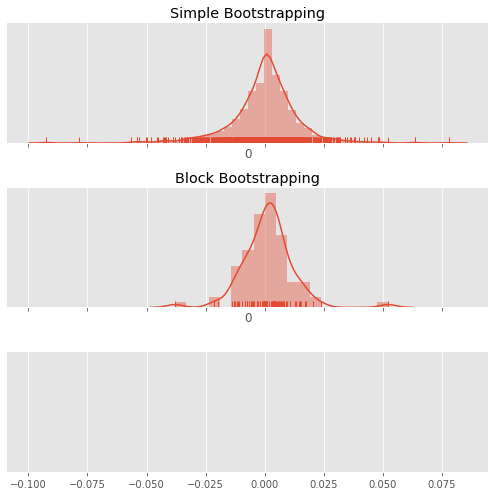

In [11]:
sample_returns.dropna()
block_sample_returns.dropna()
f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex = True)
sns.despine(left=True)
sns.distplot(sample_returns.iloc[:,0], rug=True,ax = axes[0])
axes[0].set_title('Simple Bootstrapping')
sns.distplot(block_sample_returns.iloc[:,0], rug = True, ax = axes[1])
axes[1].set_title('Block Bootstrapping')
plt.setp(axes, yticks = [])
plt.tight_layout()

In [17]:
#Las distribuciones siguen teniendo campana de Gauss , aunque se han desviado un poco de la media.

### Ejercicio 9

In [12]:
sample_returns.iloc[0] = 1
sample_returns.cumsum()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-27,0.993871,0.999965,0.989481,0.997323,1.004157,0.993776,0.998496,0.988525,1.000401,1.011240,...,1.011878,1.000000,1.002473,0.996610,1.021741,0.982983,1.026791,1.000710,0.995130,0.997389
2019-05-28,0.999063,0.959418,1.006982,0.978291,0.998448,0.975547,1.016816,0.990164,1.030615,1.020994,...,1.011175,1.007836,1.015829,0.994125,1.077185,0.969750,1.033245,1.000710,0.995130,0.996630
2019-05-29,0.997106,0.964645,0.988880,0.989245,0.973059,0.975547,1.006945,0.993344,1.028256,1.024456,...,0.984571,1.007836,1.015829,0.990475,1.082158,1.003194,1.033448,1.000710,0.981281,0.999383
2019-05-30,0.963550,0.965442,0.991356,0.993062,0.957966,0.959450,1.005140,0.991035,0.987174,1.026899,...,0.980803,0.978512,1.018842,0.979895,1.057391,1.016702,1.041197,0.987196,0.974166,0.995535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-15,0.894229,0.859395,1.770626,0.899153,0.812761,1.048590,1.043777,2.467875,1.067844,1.083085,...,0.594826,1.432752,1.164274,1.585890,1.172225,1.501122,2.021220,1.175715,1.249739,1.170764
2024-03-18,0.893390,0.849032,1.756085,0.896973,0.807499,1.067776,1.042828,2.464685,1.070246,1.082868,...,0.605650,1.414517,1.160276,1.574550,1.178804,1.492950,2.040114,1.166775,1.250714,1.171178
2024-03-19,0.889861,0.863302,1.743059,0.896973,0.796160,1.072907,1.021919,2.456234,1.070246,1.058751,...,0.607859,1.406622,1.169336,1.576677,1.178804,1.490346,2.044620,1.160351,1.260024,1.202981
2024-03-20,0.885475,0.864132,1.710769,0.896819,0.801033,1.085487,1.016325,2.455572,1.060704,1.063970,...,0.599408,1.428470,1.172299,1.588180,1.158361,1.490471,2.057461,1.165215,1.255747,1.238655


In [13]:
block_sample_returns.iloc[0] = 1
block_sample_returns.cumsum()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2019-05-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-06-13,1.007205,1.009220,0.996216,1.024996,0.986286,1.000341,0.943955,0.999421,1.004608,0.974788,...,0.993451,1.009624,0.991428,1.001539,1.017989,0.998067,1.004183,0.998290,1.014272,0.986974
2019-07-03,1.006332,1.006119,0.997756,1.013117,0.978988,1.002870,0.952627,0.999421,1.013659,0.974609,...,0.967466,0.996478,0.996018,0.983189,1.025676,1.021732,1.013041,0.997249,1.003304,0.978523
2019-07-23,1.007335,1.033868,0.992004,1.000908,0.990945,0.998762,0.963451,1.003977,1.014967,0.973418,...,0.966672,1.008532,0.963171,0.989908,1.001056,1.032811,0.987999,0.995163,0.991425,0.978945
2019-08-12,0.998956,1.014065,0.996956,1.000670,0.987415,0.996119,0.967972,0.993771,1.014967,0.984290,...,0.962412,1.016112,0.975278,1.003292,1.007676,1.051950,0.990987,0.998659,1.006756,0.990926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,1.115679,0.918929,0.980849,0.985111,0.912210,0.894771,0.953775,0.936416,1.051011,0.968748,...,0.853517,1.302356,1.140891,1.058575,0.936618,0.806494,1.151468,0.827707,1.025772,1.053958
2024-01-18,1.115596,0.908002,0.977391,0.986911,0.905053,0.894771,0.962590,0.922566,1.046661,0.956165,...,0.850066,1.267795,1.141069,1.066024,0.942114,0.807027,1.151468,0.812544,1.035947,1.055872
2024-02-07,1.113664,0.909934,0.998690,0.987779,0.899836,0.896767,0.938355,0.929156,1.043536,0.960936,...,0.867753,1.287153,1.062674,1.073473,0.932253,0.803785,1.149905,0.823103,1.027949,1.053554
2024-02-27,1.119436,0.910605,0.993876,0.981584,0.896834,0.878928,0.918464,0.929035,1.038060,0.943619,...,0.864753,1.275186,1.062674,1.053943,0.940605,0.807576,1.183349,0.819697,1.020683,1.023365


### Ejercicio 10

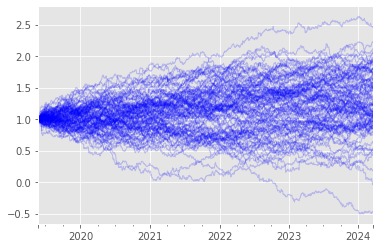

In [14]:
sample_returns.cumsum().iloc[:,0:100].plot(legend = False, linewidth=1, alpha=0.2, color = 'b')

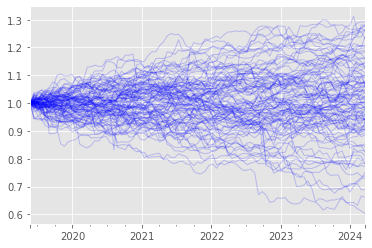

In [15]:
block_sample_returns.cumsum().iloc[:,0:100].plot(legend = False, linewidth = 1, alpha=0.2, color = 'b')

## Tratamiento de series financieras

In [16]:
etf_ive  = pd.read_csv('IVE_tickbidask.txt',
                     header = None,
                     names = ['day', 'time', 'price', 'bid', 'ask', 'vol'],
                     iterator = True,
                     chunksize = 1000000
                      )
etf_ive_df = etf_ive.get_chunk(1000000)
etf_ive_df

,day,time,price,bid,ask,vol
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
999995,09/29/2011,15:23:57,52.15,52.15,52.16,400
999996,09/29/2011,15:23:57,52.15,52.15,52.16,400
999997,09/29/2011,15:24:01,52.16,52.15,52.16,400
999998,09/29/2011,15:24:01,52.16,52.15,52.16,100


In [17]:
def prepare_data(etf_ive_df):
    etf_ive_df['date'] = pd.to_datetime(etf_ive_df['day'] + etf_ive_df['time'],
                                format ='%m/%d/%Y%H:%M:%S')
    etf_ive_df['dollar_vol'] = etf_ive_df['price']*etf_ive_df['vol']
    etf_ive_df = etf_ive_df.set_index('date')
    etf_ive_df = etf_ive_df.drop(['day', 'time'],
                 axis=1)
    etf_ive_df = etf_ive_df.drop_duplicates()

In [18]:
prepare_data(etf_ive_df)
etf_ive_df

,day,time,price,bid,ask,vol,date,dollar_vol
0,09/28/2009,09:30:00,50.79,50.70,50.79,100,2009-09-28 09:30:00,5079.00
1,09/28/2009,09:30:00,50.71,50.70,50.79,638,2009-09-28 09:30:00,32352.98
2,09/28/2009,09:31:32,50.75,50.75,50.76,100,2009-09-28 09:31:32,5075.00
3,09/28/2009,09:31:32,50.75,50.75,50.76,100,2009-09-28 09:31:32,5075.00
4,09/28/2009,09:31:33,50.75,50.75,50.76,100,2009-09-28 09:31:33,5075.00
...,...,...,...,...,...,...,...,...
999995,09/29/2011,15:23:57,52.15,52.15,52.16,400,2011-09-29 15:23:57,20860.00
999996,09/29/2011,15:23:57,52.15,52.15,52.16,400,2011-09-29 15:23:57,20860.00
999997,09/29/2011,15:24:01,52.16,52.15,52.16,400,2011-09-29 15:24:01,20864.00
999998,09/29/2011,15:24:01,52.16,52.15,52.16,100,2011-09-29 15:24:01,5216.00


### Ejercicios 2 y 3

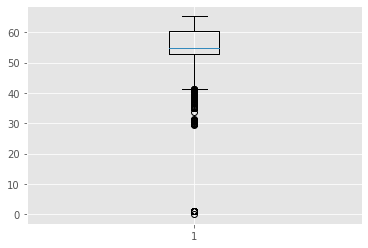

In [19]:
fig, ax = plt.subplots()
_ = ax.boxplot(etf_ive_df.price)

In [20]:
from clean_data import clean_outlier
clean = clean_outlier(etf_ive_df.price.values)

In [21]:
print(clean.sum())

129


In [22]:
#Eliminamos filas que no nos sirven
etf_ive_df = etf_ive_df.loc[~clean]

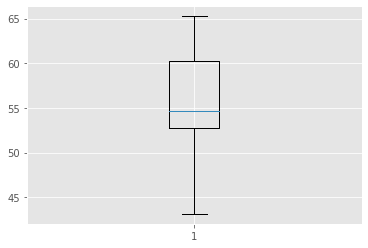

In [23]:
fig, ax = plt.subplots()
_ = ax.boxplot(etf_ive_df.price)

In [24]:
etf_ive_df.head()

,day,time,price,bid,ask,vol,date,dollar_vol
0,09/28/2009,09:30:00,50.79,50.70,50.79,100,2009-09-28 09:30:00,5079.00
1,09/28/2009,09:30:00,50.71,50.70,50.79,638,2009-09-28 09:30:00,32352.98
2,09/28/2009,09:31:32,50.75,50.75,50.76,100,2009-09-28 09:31:32,5075.00
3,09/28/2009,09:31:32,50.75,50.75,50.76,100,2009-09-28 09:31:32,5075.00
4,09/28/2009,09:31:33,50.75,50.75,50.76,100,2009-09-28 09:31:33,5075.00


In [31]:
etf_ive_df = etf_ive_df.set_index('date')

In [32]:
etf_ive_df

,day,time,price,bid,ask,vol,dollar_vol
date,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30:00,50.79,50.70,50.79,100,5079.00
2009-09-28 09:30:00,09/28/2009,09:30:00,50.71,50.70,50.79,638,32352.98
2009-09-28 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:32,09/28/2009,09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:33,09/28/2009,09:31:33,50.75,50.75,50.76,100,5075.00
...,...,...,...,...,...,...,...
2011-09-29 15:23:57,09/29/2011,15:23:57,52.15,52.15,52.16,400,20860.00
2011-09-29 15:23:57,09/29/2011,15:23:57,52.15,52.15,52.16,400,20860.00
2011-09-29 15:24:01,09/29/2011,15:24:01,52.16,52.15,52.16,400,20864.00


In [33]:
from visualization import plot_candle

In [34]:
etf_ive_df_ohlc_monthly = etf_ive_df.price.resample('1M').ohlc() 
etf_ive_df_ohlc_monthly 

,open,high,low,close
date,,,,
2009-09-30,50.79,51.9600,50.7100,51.2900
2009-10-31,51.16,53.0822,49.1800,49.3602
2009-11-30,49.63,53.2100,48.9300,52.4400
2009-12-31,52.87,53.9600,52.2700,53.0100
2010-01-31,53.55,55.1790,51.8400,51.8900
2010-02-28,52.51,53.6400,50.2410,53.2600
2010-03-31,53.54,57.1100,53.5000,56.4600
2010-04-30,56.91,59.1000,56.6100,57.5600
2010-05-31,57.87,58.4700,43.1300,53.0400


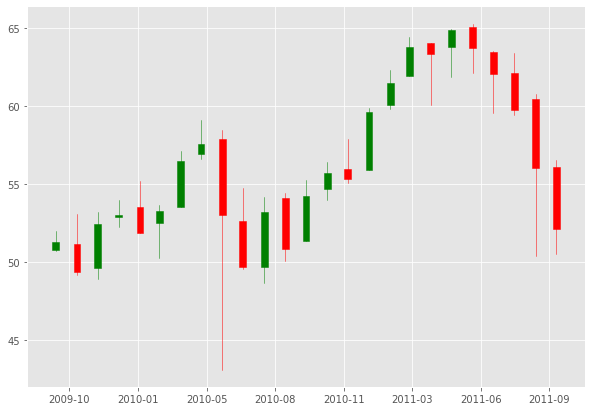

In [35]:
candle_monthtly_plot = plot_candle(etf_ive_df_ohlc_monthly,width=10)

In [36]:
etf_ive_df_ohlc_hourly = etf_ive_df.price.resample('1H').ohlc().dropna()
etf_ive_df_ohlc_hourly

,open,high,low,close
date,,,,
2009-09-28 09:00:00,50.7900,51.1500,50.7100,51.1200
2009-09-28 10:00:00,51.1500,51.3800,51.1500,51.2900
2009-09-28 11:00:00,51.2891,51.4400,51.2891,51.4073
2009-09-28 12:00:00,51.4100,51.5100,51.4100,51.4180
2009-09-28 13:00:00,51.4200,51.6000,51.4104,51.4800
...,...,...,...,...
2011-09-29 11:00:00,52.7400,52.9949,52.6200,52.9300
2011-09-29 12:00:00,52.9300,53.0200,52.6400,52.7700
2011-09-29 13:00:00,52.7500,52.9200,52.3000,52.5600


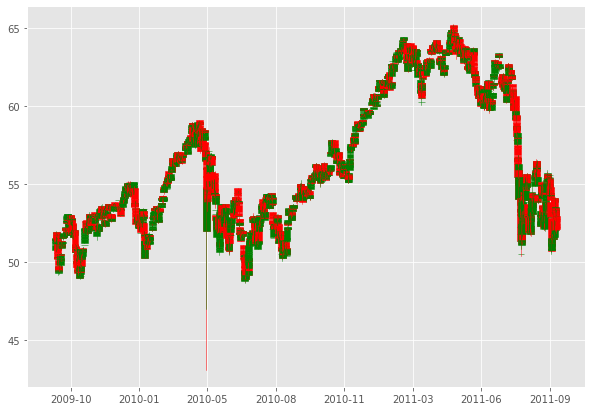

In [37]:
candle_hourly_plot = plot_candle(etf_ive_df_ohlc_hourly,width=10)

In [38]:
etf_ive_df_ohlc_daily = etf_ive_df.price.resample('1D').ohlc().dropna()
etf_ive_df_ohlc_daily

,open,high,low,close
date,,,,
2009-09-28,50.79,51.6000,50.7100,51.5400
2009-09-29,51.78,51.9600,51.3700,51.4900
2009-09-30,51.66,51.6900,50.7800,51.2900
2009-10-01,51.16,51.1600,49.7800,50.3166
2009-10-02,49.30,49.8100,49.1900,49.5100
...,...,...,...,...
2011-09-23,51.00,51.7900,50.8300,51.5200
2011-09-26,51.72,52.7100,51.1310,52.6600
2011-09-27,53.86,54.1874,52.8800,53.2000


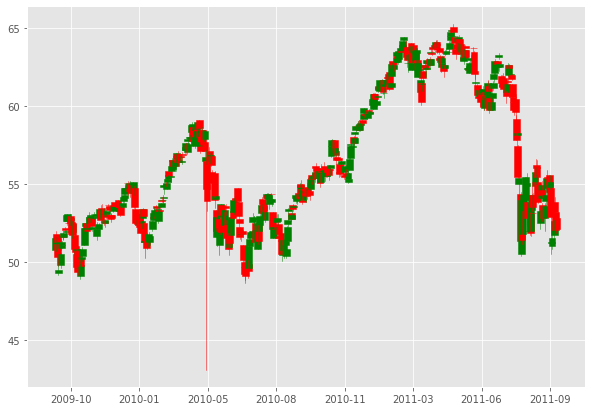

In [39]:
candle_daily_plot = plot_candle(etf_ive_df_ohlc_daily,width=10)

In [40]:
etf_ive_df_ohlc_yearly = etf_ive_df.price.resample('1Y').ohlc()
etf_ive_df_ohlc_yearly

,open,high,low,close
date,,,,
2009-12-31,50.79,53.96,48.93,53.01
2010-12-31,53.55,59.87,43.13,59.59
2011-12-31,60.02,65.26,50.42,52.15


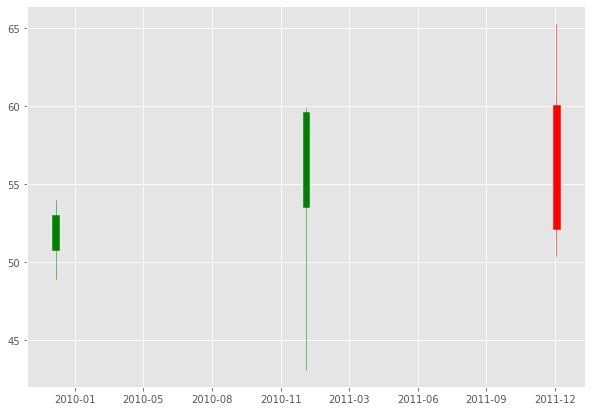

In [41]:
candle_yearly_plot = plot_candle(etf_ive_df_ohlc_yearly,width=10)

### Ejercicio 4

In [42]:
from bars import volume_bar

In [43]:
m = 10000
vol_df = volume_bar(etf_ive_df, m)
vol_df

,day,time,price,bid,ask,vol,dollar_vol,cum_vol
date,,,,,,,,
2009-09-28 09:41:53,09/28/2009,09:41:53,50.84,50.83,50.84,200,10168.0,10144
2009-09-28 09:46:35,09/28/2009,09:46:35,51.07,51.07,51.08,2000,102140.0,11900
2009-09-28 09:47:25,09/28/2009,09:47:25,51.06,51.05,51.06,100,5106.0,10000
2009-09-28 09:53:47,09/28/2009,09:53:47,51.13,51.13,51.14,1300,66469.0,10824
2009-09-28 09:54:34,09/28/2009,09:54:34,51.13,51.13,51.14,2000,102260.0,10851
...,...,...,...,...,...,...,...,...
2011-09-29 14:53:56,09/29/2011,14:53:56,52.01,52.01,52.03,400,20804.0,10330
2011-09-29 15:01:58,09/29/2011,15:01:58,52.01,52.00,52.02,400,20804.0,10076
2011-09-29 15:09:47,09/29/2011,15:09:47,51.98,51.97,51.98,100,5198.0,10087


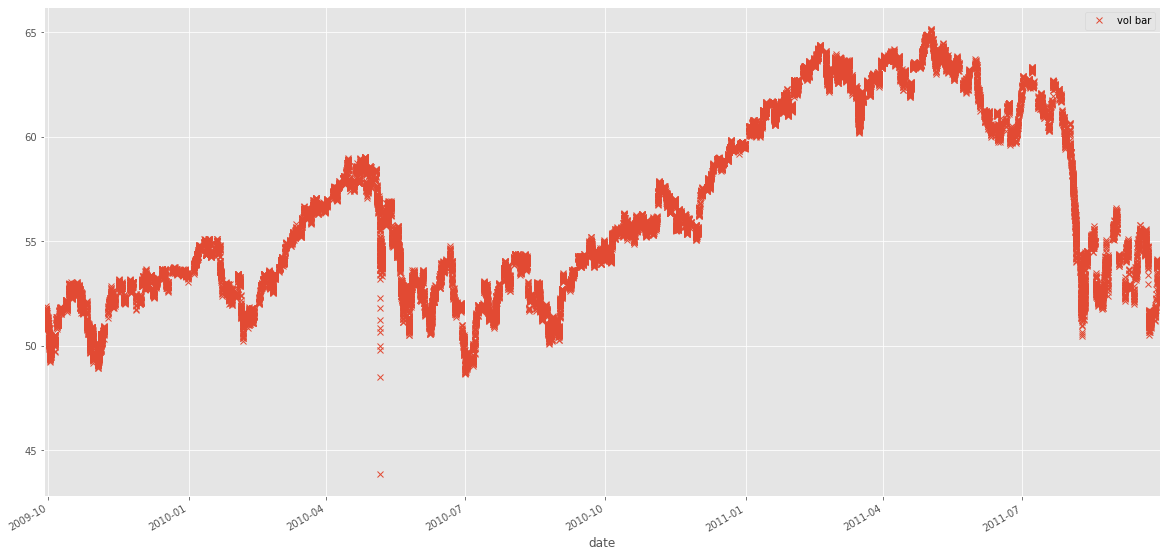

In [44]:
plt.figure(figsize=(20,10))
vol_df.price.plot(marker = 'x',
                    ls = '',
                    label ='vol bar')
plt.legend()

### Ejercicio 5

In [45]:
from bars import dollar_bar

In [46]:
m = 100000
dollar_df = dollar_bar(etf_ive_df, m)
dollar_df

,day,time,price,bid,ask,vol,dollar_vol,cum_dollar_vol
date,,,,,,,,
2009-09-28 09:31:50,09/28/2009,09:31:50,50.75,50.73,50.76,300,15225.00,103406.9800
2009-09-28 09:33:02,09/28/2009,09:33:02,50.81,50.80,50.81,300,15243.00,106657.2600
2009-09-28 09:34:04,09/28/2009,09:34:04,50.82,50.80,50.82,100,5082.00,101537.3600
2009-09-28 09:38:28,09/28/2009,09:38:28,50.81,50.79,50.81,195,9907.95,104741.5134
2009-09-28 09:42:17,09/28/2009,09:42:17,50.85,50.83,50.85,100,5085.00,104013.1204
...,...,...,...,...,...,...,...,...
2011-09-29 15:21:27,09/29/2011,15:21:27,52.00,52.00,52.02,2000,104000.00,140392.0000
2011-09-29 15:22:58,09/29/2011,15:22:58,52.10,52.10,52.11,679,35375.90,113461.9000
2011-09-29 15:23:36,09/29/2011,15:23:36,52.12,52.12,52.13,633,32991.96,120010.2600


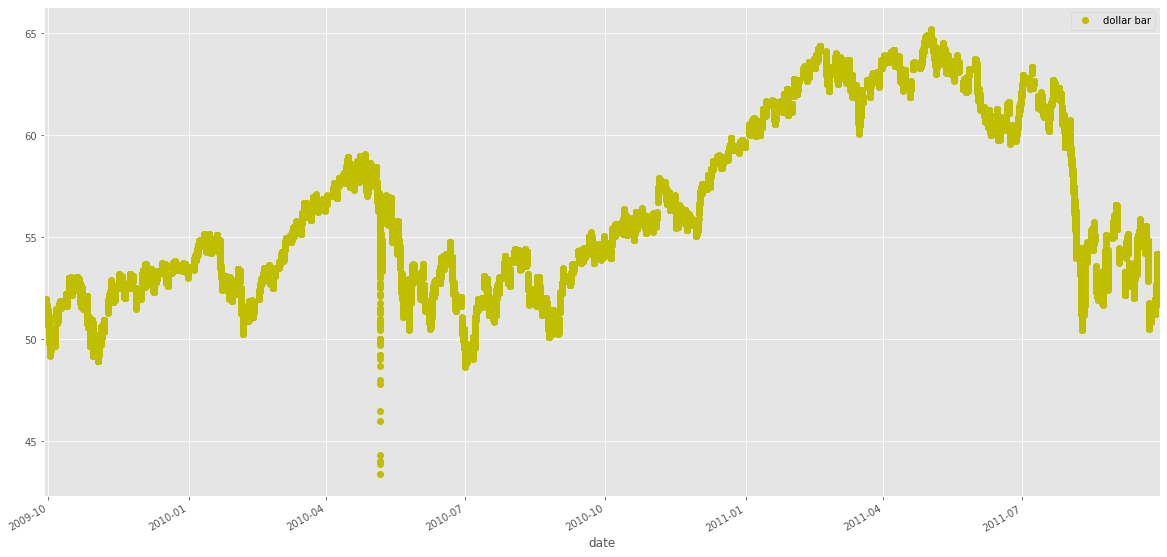

In [47]:
plt.figure(figsize=(20,10))
dollar_df.price.plot(marker = 'o',
                        ls = '',
                        color = 'y',
                        label = 'dollar bar')
plt.legend()

### Ejercicio 6

In [48]:
m = 1000000
dollar_df_2 = dollar_bar(etf_ive_df, m)
dollar_df_2

,day,time,price,bid,ask,vol,dollar_vol,cum_dollar_vol
date,,,,,,,,
2009-09-28 09:46:34,09/28/2009,09:46:34,51.070,51.07,51.08,900,45963.000,1.020027e+06
2009-09-28 09:52:47,09/28/2009,09:52:47,51.130,51.13,51.14,2000,102260.000,1.073986e+06
2009-09-28 09:54:38,09/28/2009,09:54:38,51.130,51.12,51.13,2000,102260.000,1.020145e+06
2009-09-28 09:55:26,09/28/2009,09:55:26,51.140,51.14,51.15,100,5114.000,1.004999e+06
2009-09-28 10:02:48,09/28/2009,10:02:48,51.250,51.24,51.25,700,35875.000,1.020512e+06
...,...,...,...,...,...,...,...,...
2011-09-29 14:22:03,09/29/2011,14:22:03,52.130,52.12,52.13,150,7819.500,1.004806e+06
2011-09-29 14:40:53,09/29/2011,14:40:53,52.300,52.30,52.31,100,5230.000,1.000412e+06
2011-09-29 14:47:35,09/29/2011,14:47:35,52.090,52.09,52.10,300,15627.000,1.014320e+06


In [49]:
vol_df_daily_ohlc = vol_df.price.resample('1D').ohlc().dropna()
dollar_df_2_daily_ohlc = dollar_df_2.price.resample('1D').ohlc().dropna()

In [50]:
# retornos logaritmicos
etf_ive_df_ohlc_daily_returns = np.log(etf_ive_df_ohlc_daily.close).diff().dropna()
vol_df_daily_ohlc_returns = np.log(vol_df_daily_ohlc.close).diff().dropna()
dollar_df_2_daily_ohlc_returns = np.log(dollar_df_2_daily_ohlc.close).diff().dropna()

### Ejercicio 7

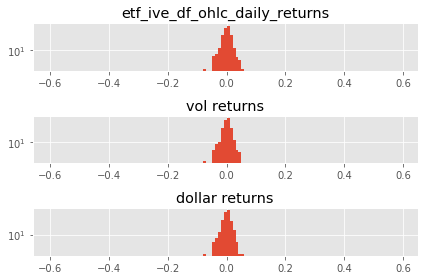

In [51]:
bins = np.arange(-0.6,0.6,0.01)
fig, ax = plt.subplots(3,1)
ax[0].hist(etf_ive_df_ohlc_daily_returns, bins = bins)
ax[0].set_title('etf_ive_df_ohlc_daily_returns')
ax[1].hist(vol_df_daily_ohlc_returns, bins = bins)
ax[1].set_title('vol returns')
ax[2].hist(dollar_df_2_daily_ohlc_returns, bins = bins)
ax[2].set_title('dollar returns')
[a.set_yscale('log') for a in ax]
fig.tight_layout()

### Ejercicios 8,9,10 y 11

In [52]:
m = 100000
dollar_df = dollar_bar(etf_ive_df, m)
dollar_df

,day,time,price,bid,ask,vol,dollar_vol,cum_dollar_vol
date,,,,,,,,
2009-09-28 09:31:50,09/28/2009,09:31:50,50.75,50.73,50.76,300,15225.00,103406.9800
2009-09-28 09:33:02,09/28/2009,09:33:02,50.81,50.80,50.81,300,15243.00,106657.2600
2009-09-28 09:34:04,09/28/2009,09:34:04,50.82,50.80,50.82,100,5082.00,101537.3600
2009-09-28 09:38:28,09/28/2009,09:38:28,50.81,50.79,50.81,195,9907.95,104741.5134
2009-09-28 09:42:17,09/28/2009,09:42:17,50.85,50.83,50.85,100,5085.00,104013.1204
...,...,...,...,...,...,...,...,...
2011-09-29 15:21:27,09/29/2011,15:21:27,52.00,52.00,52.02,2000,104000.00,140392.0000
2011-09-29 15:22:58,09/29/2011,15:22:58,52.10,52.10,52.11,679,35375.90,113461.9000
2011-09-29 15:23:36,09/29/2011,15:23:36,52.12,52.12,52.13,633,32991.96,120010.2600


In [53]:
N = 20
K = 2
ma = dollar_df.price.rolling(N).mean()
sigma = dollar_df.price.rolling(N).std()
upper_band = ma + K*sigma
lower_band = ma - K*sigma

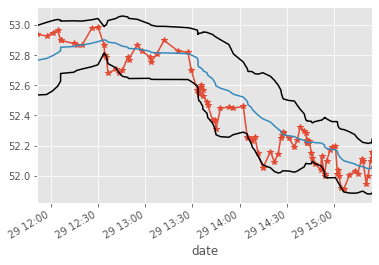

In [54]:
fig, ax= plt.subplots(1)
dollar_df.iloc[-100:].price.plot(ax=ax, marker ='*')
ma.iloc[-100:].plot(ax=ax)
upper_band.iloc[-100:].plot(ax = ax, color ='k')
lower_band.iloc[-100:].plot(ax = ax, color ='k')

In [55]:
N = 20
ma = dollar_df.price.rolling(N).mean()
price_pct = 0.001
upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb_dataframe = pd.concat([dollar_df.price, ma, upper_band, lower_band], axis = 1).dropna()
bb_dataframe.columns = ['price','ma','upper_band','lower_band']

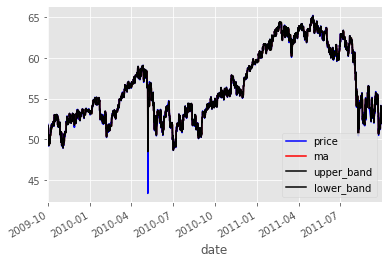

In [56]:
fig, ax = plt.subplots(1)
bb_dataframe.plot(ax = ax, color = ['b','r', 'k', 'k'])

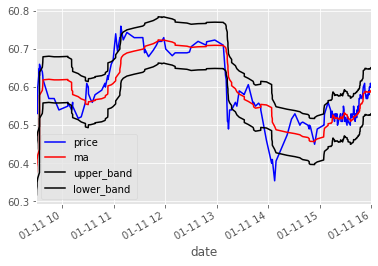

In [57]:
s_date ='2011-01-11 09:00:00'
e_date ='2011-01-11 17:00:00'

fig, ax = plt.subplots(1)
bb_dataframe.loc[s_date:e_date].plot(ax = ax, color = ['b','r', 'k', 'k'])

In [58]:
from bollinger_bands import get_up_cross

In [59]:
bb_up = get_up_cross(bb_dataframe)

In [60]:
from bollinger_bands import get_down_cross

In [61]:
bb_down = get_down_cross(bb_dataframe)

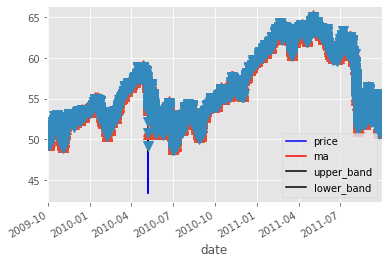

In [62]:
fig, ax = plt.subplots(1)
bb_dataframe.plot(ax=ax, color = ['b','r', 'k', 'k'])
bb_up.plot(ax = ax, marker='^', ms = 10, ls ='')
bb_down.plot(ax = ax, marker = 'v', ms = 10, ls = '')

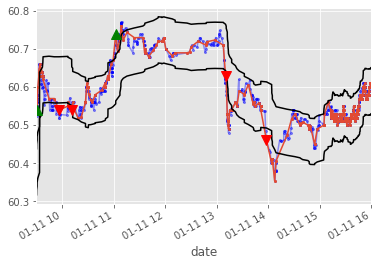

In [67]:
s_date = '2011-01-11 09:00:00'
e_date = '2011-01-11 17:00:00'

fig, ax = plt.subplots(1)
etf_ive_df.loc[s_date:e_date].price.plot(ax=ax, color = 'b', marker = 'o', alpha = 0.4, ms = 2)

bb_dataframe.loc[s_date:e_date].price.plot(ax = ax, marker ='o', ms = 2)
bb_dataframe.loc[s_date:e_date].upper_band.plot(ax = ax, color ='k')
bb_dataframe.loc[s_date:e_date].lower_band.plot(ax = ax, color ='k')
bb_up.loc[s_date:e_date].plot(ax=ax, color='g', marker = '^', ms = 10, ls = '')
bb_down.loc[s_date:e_date].plot(ax=ax, color='r', marker = 'v', ms = 10, ls = '')